In [12]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from statsmodels.stats.diagnostic import het_breuschpagan

In [22]:
# Générer des données d'exemple
np.random.seed(0)
x = np.random.rand(300) * 10
y = 2.5 * x + np.random.randn(300) * 2 + 5



In [23]:
# Ajuster le modèle de régression linéaire
model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
y_pred = model.predict(x.reshape(-1, 1))

# Calculer les résidus
residuals = y - y_pred





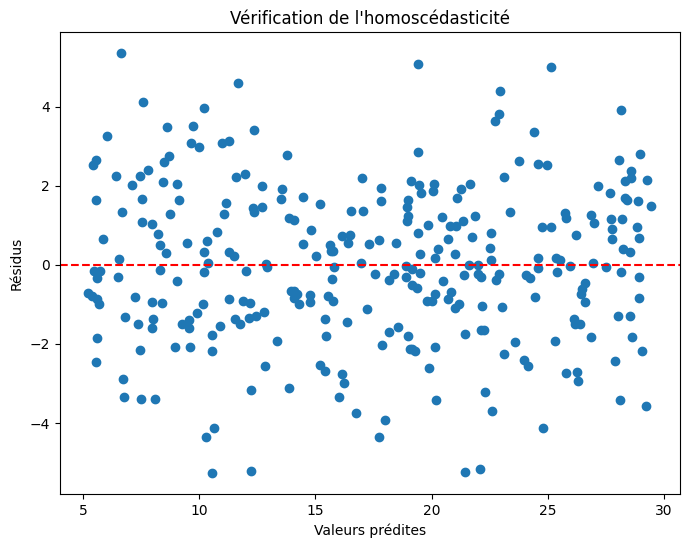

In [24]:
# Vérification de l'homoscédasticité
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Vérification de l\'homoscédasticité')
plt.show()



In [25]:
# Test de Breusch-Pagan pour l'homoscédasticité
exog = np.column_stack((np.ones(len(x)), x))
bp_test = het_breuschpagan(residuals, exog)
labels = ['LM Stat', 'LM Test p-value', 'F-Stat', 'F-Test p-value']
print(dict(zip(labels, bp_test)))



{'LM Stat': 1.009439631189235, 'LM Test p-value': 0.31503712345959434, 'F-Stat': 1.0060953420179428, 'F-Test p-value': 0.31665385927829126}


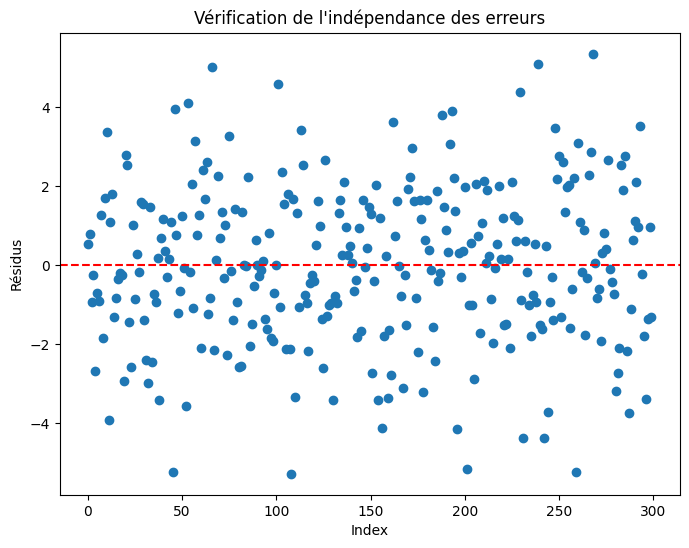

In [26]:
# Vérification de l'indépendance des erreurs
plt.figure(figsize=(8, 6))
plt.plot(residuals, marker='o', linestyle='none')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Index')
plt.ylabel('Résidus')
plt.title('Vérification de l\'indépendance des erreurs')
plt.show()



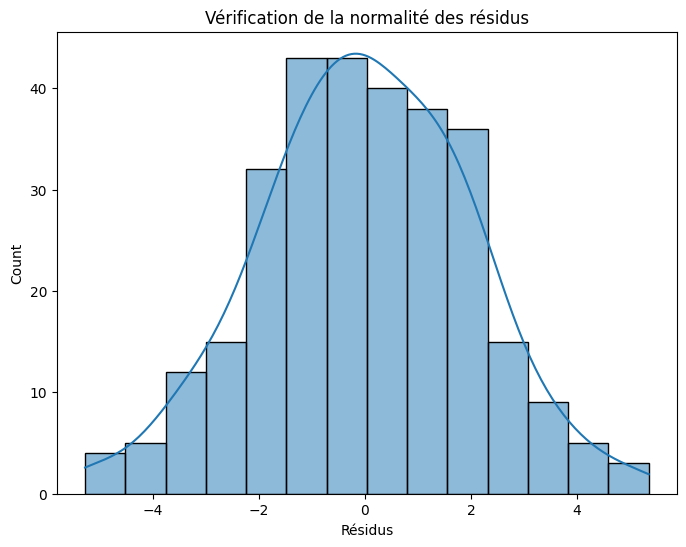

In [27]:
# Vérification de la normalité des résidus
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Résidus')
plt.title('Vérification de la normalité des résidus')
plt.show()



In [28]:
# Test de normalité de Shapiro-Wilk
shapiro_test = stats.shapiro(residuals)
print(f'Test de Shapiro-Wilk: Statistique={shapiro_test[0]}, p-value={shapiro_test[1]}')


Test de Shapiro-Wilk: Statistique=0.9970179480327056, p-value=0.8565201568303874


Coefficient β_0 (ordonnée à l'origine) : 0.45
Coefficient β_1 (pente) : 0.42
Erreur quadratique moyenne (MSE) : 0.70
Coefficient de détermination (R²) : 0.47


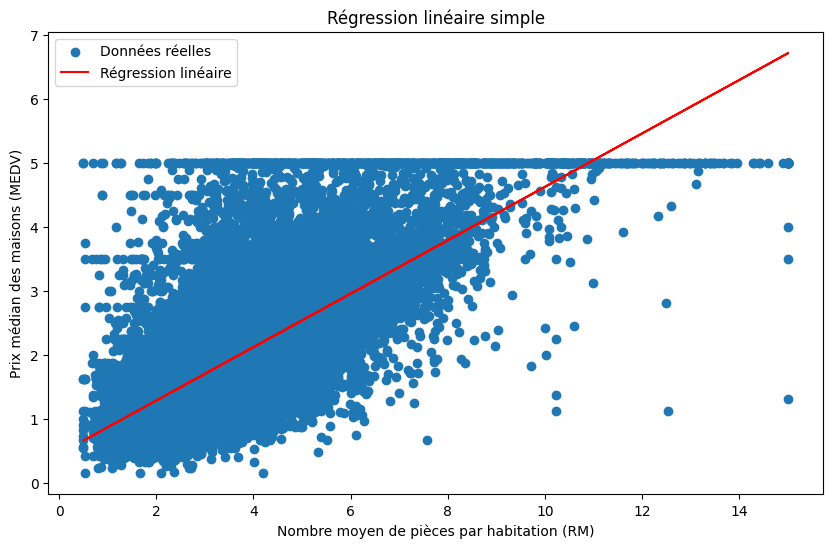

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

# Charger le jeu de données Boston Housing
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MEDV'] = housing.target

# Choisir la variable indépendante et la variable dépendante
X = df[['MedInc']]  # Nombre moyen de pièces par habitation
y = df['MEDV']  # Prix médian des maisons

# Ajuster le modèle de régression linéaire
model = LinearRegression()
model.fit(X, y)

# Coefficients de la régression
beta_0 = model.intercept_
beta_1 = model.coef_[0]

# Prédictions
y_pred = model.predict(X)

# Affichage des coefficients
print(f'Coefficient \u03B2_0 (ordonnée à l\'origine) : {beta_0:.2f}')
print(f'Coefficient \u03B2_1 (pente) : {beta_1:.2f}')

# Affichage des métriques de performance
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'Erreur quadratique moyenne (MSE) : {mse:.2f}')
print(f'Coefficient de détermination (R²) : {r2:.2f}')

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Données réelles')
plt.plot(X, y_pred, color='red', label='Régression linéaire')
plt.xlabel('Nombre moyen de pièces par habitation (RM)')
plt.ylabel('Prix médian des maisons (MEDV)')
plt.title('Régression linéaire simple')
plt.legend()
plt.show()


In [31]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
